<a href="https://colab.research.google.com/github/MKrezheska/NLP_Project-Style_Change_Detection/blob/main/Models_RoBERTa_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
import json
import numpy as np 
import time
import joblib

In [8]:
df_1 = pd.read_csv('drive/MyDrive/pan-2021/train-690-roberta-768-long-vectors.csv')
df_2 = pd.read_csv('drive/MyDrive/pan-2021/train-2000-roberta-768-long-vectors.csv')
df_3 = pd.read_csv('drive/MyDrive/pan-2021/train-4000-roberta-768-long-vectors.csv')
df_4 = pd.read_csv('drive/MyDrive/pan-2021/train-7000-roberta-768-long-vectors.csv')
df_5 = pd.read_csv('drive/MyDrive/pan-2021/train-end-roberta-768-long-vectors.csv')


df = pd.concat([df_1, df_2, df_3, df_4, df_5])

In [9]:
df

,Unnamed: 0,file_name,emb,changes,label,authors,paragraph_authors
0,0,problem-10702,"[-0.06933309137821198, 0.08886080235242844, -0...","[1, 1, 1, 0, 1]",1,2,"[1, 2, 1, 2, 2, 1]"
1,1,problem-10706,"[-0.059775013476610184, 0.08716754615306854, -...","[0, 1, 1, 1, 1, 1]",1,4,"[1, 1, 2, 3, 4, 3, 2]"
2,2,problem-10710,"[-0.05192521959543228, 0.0976557806134224, -0....","[1, 1, 0, 1, 0, 1]",1,4,"[1, 2, 3, 3, 4, 4, 3]"
3,3,problem-10712,"[-0.058702100068330765, 0.08107157796621323, -...","[0, 0, 0, 0, 1, 1]",1,2,"[1, 1, 1, 1, 1, 2, 1]"
4,4,problem-10708,"[-0.06454212963581085, 0.08104275166988373, -0...","[1, 0, 0, 0, 1]",1,3,"[1, 2, 2, 2, 2, 3]"
...,...,...,...,...,...,...,...
4195,4195,problem-207,"[-0.041760582476854324, 0.0787864625453949, -0...","[1, 0, 0]",1,2,"[1, 2, 2, 2]"
4196,4196,problem-211,"[-0.05708981305360794, 0.08273273706436157, -0...","[0, 0, 1, 0, 1, 0, 0]",1,3,"[1, 1, 1, 2, 2, 3, 3, 3]"
4197,4197,problem-208,"[-0.05604788288474083, 0.101335808634758, -0.0...","[1, 1, 0, 0, 1]",1,2,"[1, 2, 1, 1, 1, 2]"
4198,4198,problem-217,"[-0.06293439120054245, 0.0814419537782669, -0....","[1, 1, 1]",1,3,"[1, 2, 3, 2]"


In [10]:
df = df.drop(["Unnamed: 0","file_name", "changes", "label", "paragraph_authors"], axis="columns")

In [12]:
df_valid = pd.read_csv('drive/MyDrive/pan-2021/validation-roberta-768-long-vectors.csv')
df_valid.head()

,Unnamed: 0,file_name,emb,changes,label,authors,paragraph_authors
0,0,problem-1899,"[-0.06812208890914917, 0.08334814757108688, -0...","[0, 1, 1, 1, 1, 1, 0, 1]",1,4,"[1, 1, 2, 3, 1, 4, 3, 3, 1]"
1,1,problem-1906,"[-0.07429127395153046, 0.07846497744321823, -0...","[1, 0, 1]",1,3,"[1, 2, 2, 3]"
2,2,problem-1903,"[-0.06153155490756035, 0.07799900323152542, -0...","[1, 1, 1, 1, 0, 0]",1,3,"[1, 2, 3, 1, 3, 3, 3]"
3,3,problem-1900,"[-0.059520427137613297, 0.08365883678197861, -...","[1, 1, 1, 1, 1]",1,4,"[1, 2, 1, 3, 4, 2]"
4,4,problem-1904,"[-0.05482497438788414, 0.09679285436868668, -0...","[0, 1, 1, 0, 1, 1, 1, 1]",1,4,"[1, 1, 2, 3, 3, 1, 2, 4, 1]"


In [13]:
df_valid = df_valid.drop(["Unnamed: 0","file_name", "changes", "label", "paragraph_authors"], axis="columns")

In [14]:
df_train = df.iloc[:, : ]
df_test = df_valid.iloc[:, : ]
print(len(df_train))
print(len(df_test))

11197
2400


In [17]:
y_train = df_train['authors']
df_train.drop(['authors'], axis=1, inplace= True)
df_train.head(20)

,emb
0,"[-0.06933309137821198, 0.08886080235242844, -0..."
1,"[-0.059775013476610184, 0.08716754615306854, -..."
2,"[-0.05192521959543228, 0.0976557806134224, -0...."
3,"[-0.058702100068330765, 0.08107157796621323, -..."
4,"[-0.06454212963581085, 0.08104275166988373, -0..."
5,"[-0.07626723498106003, 0.07279245555400848, -0..."
6,"[-0.04915666580200195, 0.07974720746278763, -0..."
7,"[-0.04666608199477196, 0.08518311381340027, -0..."
8,"[-0.05412495136260986, 0.07708549499511719, -0..."
9,"[-0.06253185123205185, 0.08380239456892014, -0..."


In [18]:
y_test = df_test['authors']
df_test.drop(['authors'], axis=1, inplace= True)
df_test.head(20)

,emb
0,"[-0.06812208890914917, 0.08334814757108688, -0..."
1,"[-0.07429127395153046, 0.07846497744321823, -0..."
2,"[-0.06153155490756035, 0.07799900323152542, -0..."
3,"[-0.059520427137613297, 0.08365883678197861, -..."
4,"[-0.05482497438788414, 0.09679285436868668, -0..."
5,"[-0.04895215108990669, 0.09911777079105377, -0..."
6,"[-0.06733780354261398, 0.09219272434711456, -0..."
7,"[-0.06058989837765694, 0.08327583968639374, -0..."
8,"[-0.06618160009384155, 0.09293551743030548, -0..."
9,"[-0.05665931850671768, 0.08093248307704926, -0..."


In [19]:
xtrain = df_train.values.tolist()
X_test = df_test.values.tolist()

In [20]:
xtrain = [eval(xtrain[i][0]) for i in range(0, len(xtrain))]
X_test = [eval(X_test[i][0]) for i in range(0, len(X_test))]

In [21]:
xtrain = np.asarray(xtrain)

In [22]:
X_test = np.asarray(X_test)

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [24]:
def print_confusion_matrix(preds, labels, names):
  print(classification_report(labels, preds))

  # Mатрица на конфузија 
  names = names
  confusion = confusion_matrix(labels, preds)
  confusion = 100 * confusion.astype('float') / confusion.sum(axis=-1)[:, np.newaxis]
  df_1 = pd.DataFrame(data=confusion, columns=names, index=names)
  image = sns.heatmap(df_1, annot=True, fmt=".1f", vmin=0, vmax=100,cmap='Greens')
  image.set_title('Confusion matrix')
  image.set_ylabel('True label')
  image.set_xlabel('Predicted label')
  image.plot()

In [25]:
ytrain = y_train

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

dtc = DecisionTreeClassifier()
nbc = GaussianNB()
rfc = RandomForestClassifier()

dtc.fit(xtrain, ytrain)
nbc.fit(xtrain, ytrain)
rfc.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
test_tree_predict = dtc.predict(X_test)
test_naive_predict = nbc.predict(X_test)
test_random_forest_predict = rfc.predict(X_test)

              precision    recall  f1-score   support

           1       0.37      0.35      0.36       600
           2       0.27      0.28      0.27       600
           3       0.25      0.25      0.25       600
           4       0.31      0.33      0.32       600

    accuracy                           0.30      2400
   macro avg       0.30      0.30      0.30      2400
weighted avg       0.30      0.30      0.30      2400



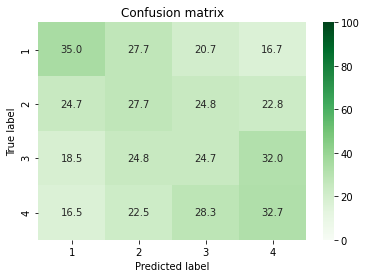

In [29]:
print_confusion_matrix(test_tree_predict,y_test, ["1", "2", "3", "4"])

              precision    recall  f1-score   support

           1       0.43      0.45      0.44       600
           2       0.33      0.22      0.26       600
           3       0.32      0.14      0.20       600
           4       0.36      0.67      0.46       600

    accuracy                           0.37      2400
   macro avg       0.36      0.37      0.34      2400
weighted avg       0.36      0.37      0.34      2400



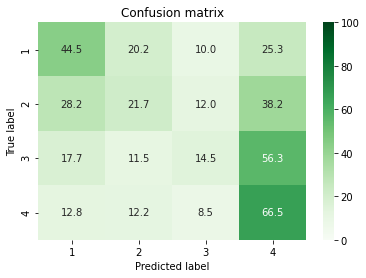

In [30]:
print_confusion_matrix(test_naive_predict, y_test, ["1", "2", "3", "4"])

              precision    recall  f1-score   support

           1       0.48      0.55      0.52       600
           2       0.31      0.26      0.28       600
           3       0.31      0.26      0.28       600
           4       0.41      0.49      0.45       600

    accuracy                           0.39      2400
   macro avg       0.38      0.39      0.38      2400
weighted avg       0.38      0.39      0.38      2400



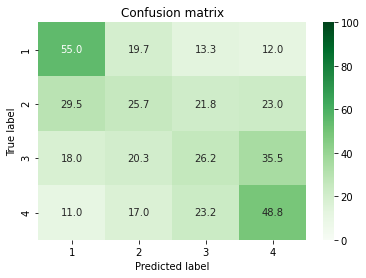

In [31]:
print_confusion_matrix(test_random_forest_predict,y_test, ["1", "2", "3", "4"])

In [33]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score


parameters_rf = {
          "criterion":['gini','entropy'],
          "max_depth": [3,5,None],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 5],
          "min_samples_split": [2, 5],
          'bootstrap': [False, True],
          'max_samples': [0.5, 1],
          'n_estimators': [2, 5, 100],
          "oob_score":[False, True],
           "random_state":[None,2]
         }


gs_rf = RandomizedSearchCV(rfc, parameters_rf, scoring='accuracy', n_jobs=3)
gs_rf.fit(xtrain, ytrain)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [65]:
print("Best score: %0.3f" % gs_rf.best_score_) 
print("Best parameters set:" )
best_parameters_rf = gs_rf.best_estimator_.get_params()
for param_name_rf in sorted (parameters_rf . keys()): 
                    print("\t %s: %r" % (param_name_rf, best_parameters_rf[param_name_rf]))
        
y_pred = gs_rf.predict(X_test)

Best score: 0.377
Best parameters set:
	 bootstrap: True
	 criterion: 'entropy'
	 max_depth: 5
	 max_features: None
	 max_samples: 0.5
	 min_samples_leaf: 1
	 min_samples_split: 5
	 n_estimators: 100
	 oob_score: False
	 random_state: None


accuracy:  0.3754166666666667
              precision    recall  f1-score   support

           1       0.42      0.59      0.49       600
           2       0.33      0.17      0.23       600
           3       0.35      0.07      0.12       600
           4       0.36      0.67      0.46       600

    accuracy                           0.38      2400
   macro avg       0.36      0.38      0.33      2400
weighted avg       0.36      0.38      0.33      2400



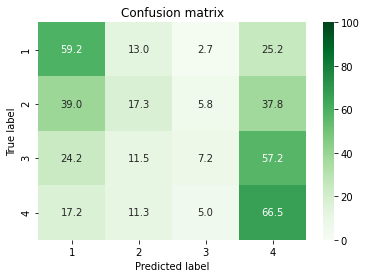

In [66]:
print("accuracy: ",accuracy_score(y_test, y_pred))
print_confusion_matrix( y_pred,y_test, ["1", "2", "3", "4"])

In [36]:
X_train_norm = xtrain
X_test_norm = X_test

In [37]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 27 kB/s 


In [38]:
from catboost import Pool, cv, CatBoostClassifier, CatBoostRegressor

In [39]:
train_pool = Pool(data=xtrain,label = ytrain)

In [40]:
import sklearn.metrics as metrics

In [41]:
model_basic = CatBoostClassifier()
model_basic.fit(train_pool, plot=True,silent=True)
print(model_basic.get_best_score())

predicted_values = model_basic.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'MultiClass': 0.43300333889936643}}


              precision    recall  f1-score   support

           1       0.52      0.59      0.55       600
           2       0.36      0.31      0.33       600
           3       0.35      0.28      0.31       600
           4       0.42      0.52      0.46       600

    accuracy                           0.42      2400
   macro avg       0.41      0.42      0.41      2400
weighted avg       0.41      0.42      0.41      2400

Accuracy: 0.4225


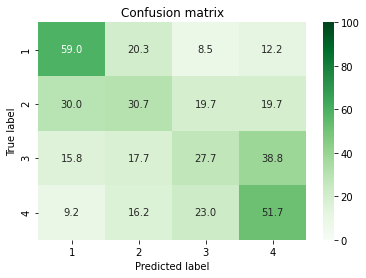

In [42]:
print_confusion_matrix(predicted_values, y_test, ["1", "2", "3", "4"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
import matplotlib.pyplot as plt

Learning rate:  0.5
              precision    recall  f1-score   support

           1       0.49      0.49      0.49       600
           2       0.31      0.28      0.29       600
           3       0.33      0.33      0.33       600
           4       0.41      0.45      0.43       600

    accuracy                           0.39      2400
   macro avg       0.38      0.39      0.39      2400
weighted avg       0.38      0.39      0.39      2400



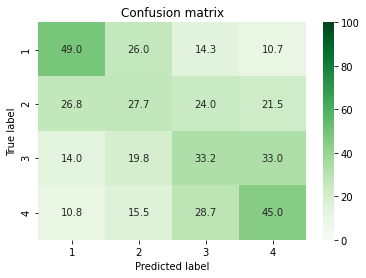

Learning rate:  0.75
              precision    recall  f1-score   support

           1       0.46      0.47      0.47       600
           2       0.32      0.31      0.31       600
           3       0.32      0.29      0.30       600
           4       0.43      0.46      0.44       600

    accuracy                           0.38      2400
   macro avg       0.38      0.38      0.38      2400
weighted avg       0.38      0.38      0.38      2400



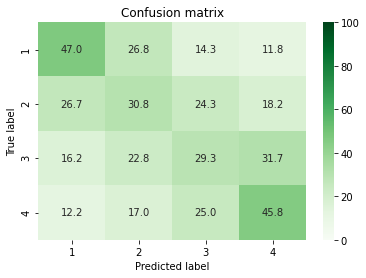

Learning rate:  1
              precision    recall  f1-score   support

           1       0.46      0.47      0.47       600
           2       0.32      0.31      0.32       600
           3       0.30      0.29      0.30       600
           4       0.39      0.41      0.40       600

    accuracy                           0.37      2400
   macro avg       0.37      0.37      0.37      2400
weighted avg       0.37      0.37      0.37      2400



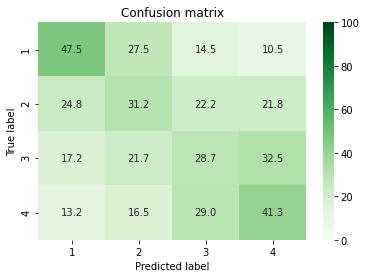

Learning rate:  1.1
              precision    recall  f1-score   support

           1       0.48      0.46      0.47       600
           2       0.30      0.31      0.30       600
           3       0.29      0.27      0.28       600
           4       0.36      0.39      0.38       600

    accuracy                           0.36      2400
   macro avg       0.36      0.36      0.36      2400
weighted avg       0.36      0.36      0.36      2400



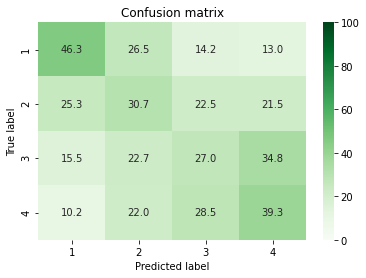

Learning rate:  1.2
              precision    recall  f1-score   support

           1       0.45      0.43      0.44       600
           2       0.28      0.24      0.26       600
           3       0.27      0.28      0.28       600
           4       0.38      0.43      0.40       600

    accuracy                           0.35      2400
   macro avg       0.35      0.35      0.35      2400
weighted avg       0.35      0.35      0.35      2400



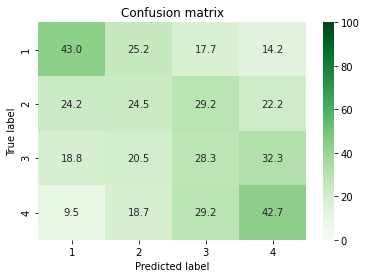

Learning rate:  1.3
              precision    recall  f1-score   support

           1       0.47      0.43      0.45       600
           2       0.30      0.29      0.29       600
           3       0.29      0.30      0.29       600
           4       0.37      0.40      0.39       600

    accuracy                           0.35      2400
   macro avg       0.36      0.35      0.35      2400
weighted avg       0.36      0.35      0.35      2400



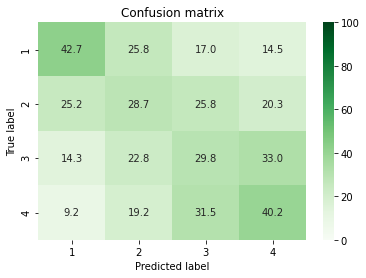

Learning rate:  1.4
              precision    recall  f1-score   support

           1       0.44      0.43      0.43       600
           2       0.31      0.30      0.30       600
           3       0.26      0.26      0.26       600
           4       0.35      0.38      0.37       600

    accuracy                           0.34      2400
   macro avg       0.34      0.34      0.34      2400
weighted avg       0.34      0.34      0.34      2400



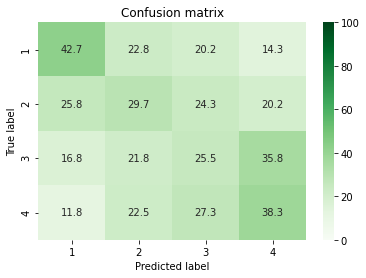

Learning rate:  1.5
              precision    recall  f1-score   support

           1       0.43      0.43      0.43       600
           2       0.29      0.28      0.28       600
           3       0.28      0.28      0.28       600
           4       0.36      0.37      0.36       600

    accuracy                           0.34      2400
   macro avg       0.34      0.34      0.34      2400
weighted avg       0.34      0.34      0.34      2400



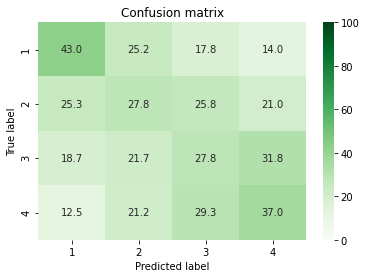

Learning rate:  2
              precision    recall  f1-score   support

           1       1.00      0.00      0.00       600
           2       0.24      0.16      0.19       600
           3       0.25      0.84      0.39       600
           4       0.00      0.00      0.00       600

    accuracy                           0.25      2400
   macro avg       0.37      0.25      0.15      2400
weighted avg       0.37      0.25      0.15      2400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


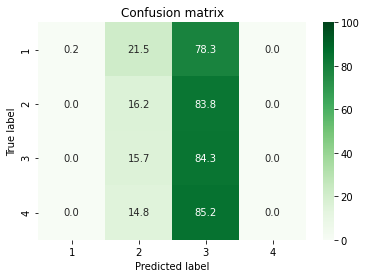

Learning rate:  3
              precision    recall  f1-score   support

           1       0.80      0.01      0.01       600
           2       0.26      0.56      0.35       600
           3       0.26      0.48      0.34       600
           4       0.00      0.00      0.00       600

    accuracy                           0.26      2400
   macro avg       0.33      0.26      0.18      2400
weighted avg       0.33      0.26      0.18      2400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


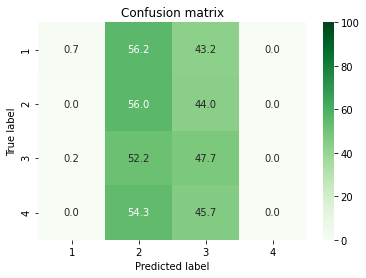

Learning rate:  4
              precision    recall  f1-score   support

           1       0.37      0.13      0.19       600
           2       0.25      0.91      0.39       600
           3       0.00      0.00      0.00       600
           4       0.00      0.00      0.00       600

    accuracy                           0.26      2400
   macro avg       0.16      0.26      0.15      2400
weighted avg       0.16      0.26      0.15      2400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


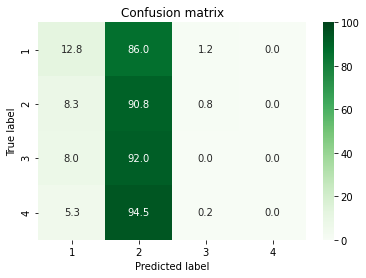

Learning rate:  5
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       600
           2       0.00      0.00      0.00       600
           3       0.29      0.00      0.01       600
           4       0.25      1.00      0.40       600

    accuracy                           0.25      2400
   macro avg       0.13      0.25      0.10      2400
weighted avg       0.13      0.25      0.10      2400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


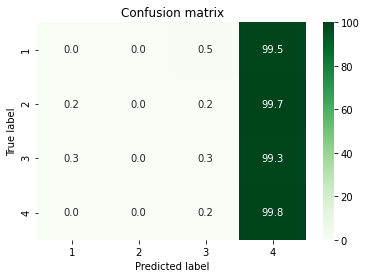

Learning rate:  6.3
              precision    recall  f1-score   support

           1       0.15      0.00      0.01       600
           2       0.00      0.00      0.00       600
           3       0.00      0.00      0.00       600
           4       0.25      1.00      0.40       600

    accuracy                           0.25      2400
   macro avg       0.10      0.25      0.10      2400
weighted avg       0.10      0.25      0.10      2400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


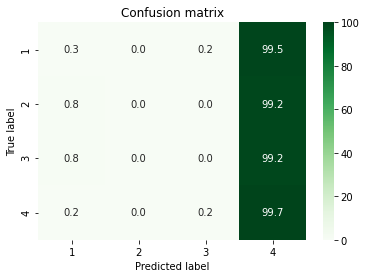

Learning rate:  7.7
              precision    recall  f1-score   support

           1       0.31      0.66      0.42       600
           2       0.00      0.00      0.00       600
           3       0.28      0.51      0.36       600
           4       0.00      0.00      0.00       600

    accuracy                           0.29      2400
   macro avg       0.15      0.29      0.19      2400
weighted avg       0.15      0.29      0.19      2400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


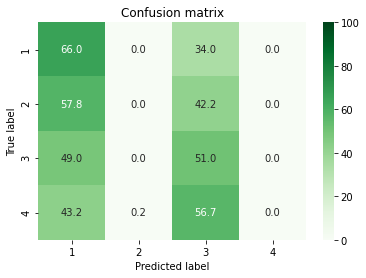

Learning rate:  10
              precision    recall  f1-score   support

           1       0.33      0.37      0.35       600
           2       0.24      0.70      0.36       600
           3       0.00      0.00      0.00       600
           4       0.00      0.00      0.00       600

    accuracy                           0.27      2400
   macro avg       0.14      0.27      0.18      2400
weighted avg       0.14      0.27      0.18      2400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


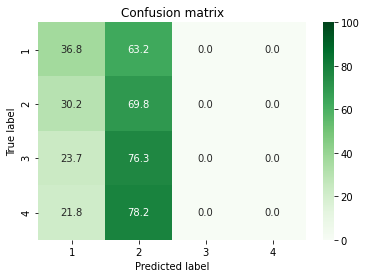

Learning rate:  20
              precision    recall  f1-score   support

           1       0.22      0.59      0.32       600
           2       0.30      0.27      0.29       600
           3       0.24      0.09      0.13       600
           4       0.26      0.01      0.02       600

    accuracy                           0.24      2400
   macro avg       0.26      0.24      0.19      2400
weighted avg       0.26      0.24      0.19      2400



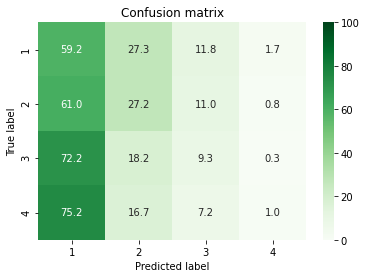

Learning rate:  30
              precision    recall  f1-score   support

           1       0.67      0.00      0.01       600
           2       0.25      0.21      0.23       600
           3       0.25      0.79      0.38       600
           4       0.21      0.01      0.01       600

    accuracy                           0.25      2400
   macro avg       0.35      0.25      0.16      2400
weighted avg       0.35      0.25      0.16      2400



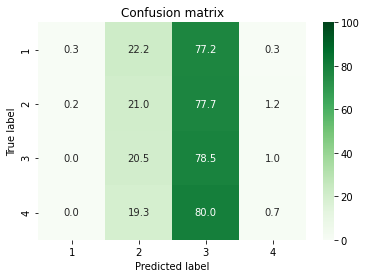

Learning rate:  45
              precision    recall  f1-score   support

           1       0.17      0.00      0.00       600
           2       0.41      0.01      0.03       600
           3       0.29      0.03      0.06       600
           4       0.26      0.98      0.41       600

    accuracy                           0.26      2400
   macro avg       0.28      0.26      0.12      2400
weighted avg       0.28      0.26      0.12      2400



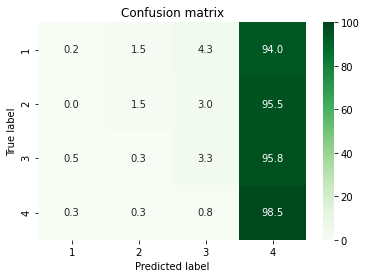

Learning rate:  55
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       600
           2       0.36      0.01      0.02       600
           3       0.25      0.12      0.17       600
           4       0.26      0.90      0.40       600

    accuracy                           0.26      2400
   macro avg       0.22      0.26      0.15      2400
weighted avg       0.22      0.26      0.15      2400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


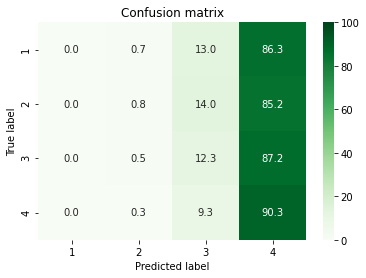

Learning rate:  62
              precision    recall  f1-score   support

           1       0.37      0.04      0.06       600
           2       0.43      0.01      0.01       600
           3       0.17      0.00      0.00       600
           4       0.25      0.98      0.40       600

    accuracy                           0.26      2400
   macro avg       0.30      0.26      0.12      2400
weighted avg       0.30      0.26      0.12      2400



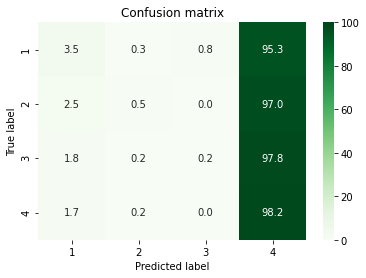

Learning rate:  77
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       600
           2       0.29      0.25      0.27       600
           3       0.25      0.18      0.21       600
           4       0.25      0.60      0.35       600

    accuracy                           0.26      2400
   macro avg       0.20      0.26      0.21      2400
weighted avg       0.20      0.26      0.21      2400



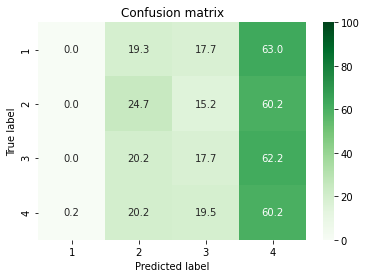

Learning rate:  84
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       600
           2       0.27      0.28      0.27       600
           3       0.28      0.02      0.03       600
           4       0.26      0.77      0.39       600

    accuracy                           0.26      2400
   macro avg       0.20      0.26      0.17      2400
weighted avg       0.20      0.26      0.17      2400



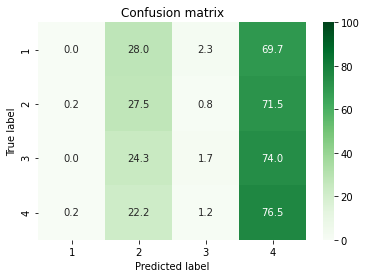

Learning rate:  90
              precision    recall  f1-score   support

           1       0.32      0.04      0.07       600
           2       0.24      0.32      0.27       600
           3       0.25      0.50      0.33       600
           4       0.18      0.10      0.13       600

    accuracy                           0.24      2400
   macro avg       0.25      0.24      0.20      2400
weighted avg       0.25      0.24      0.20      2400



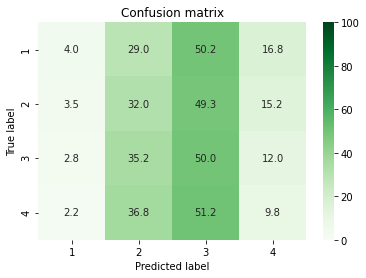

In [46]:
lr_list = [ 0.5, 0.75, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 2, 3, 4, 5, 6.3, 7.7, 10, 20, 30, 45, 55, 62, 77, 84, 90]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=2, max_depth=4, random_state=0)
    gb_clf.fit(xtrain, ytrain)
    predicted_values = gb_clf.predict(X_test)

    print("Learning rate: ", learning_rate)
    print_confusion_matrix(predicted_values, y_test, ["1", "2", "3", "4"])
    plt.show()

In [47]:
from sklearn.model_selection import train_test_split
import scipy.stats as st

In [48]:
X_val, X_test_1, y_val, y_test_1 = train_test_split(X_test, y_test, test_size=0.7, random_state=42)

In [49]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier((20, ), max_iter=100000).fit(xtrain, ytrain)

In [50]:
predicted_values = clf.predict(X_test)

              precision    recall  f1-score   support

           1       0.58      0.50      0.54       600
           2       0.41      0.27      0.33       600
           3       0.29      0.15      0.20       600
           4       0.36      0.70      0.48       600

    accuracy                           0.41      2400
   macro avg       0.41      0.41      0.39      2400
weighted avg       0.41      0.41      0.39      2400

Accuracy: 0.4075


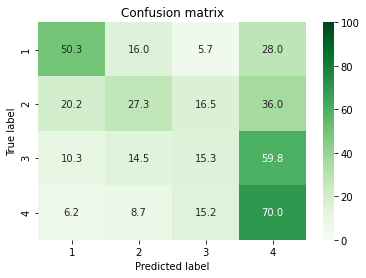

In [51]:
print_confusion_matrix(predicted_values, y_test,["1", "2", "3", "4"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

              precision    recall  f1-score   support

           1       0.54      0.60      0.57       600
           2       0.42      0.28      0.34       600
           3       0.32      0.24      0.28       600
           4       0.39      0.56      0.46       600

    accuracy                           0.42      2400
   macro avg       0.42      0.42      0.41      2400
weighted avg       0.42      0.42      0.41      2400

Accuracy: 0.42291666666666666


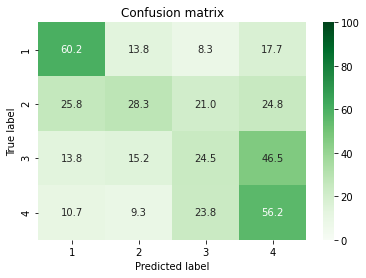

In [52]:
clf = MLPClassifier((20, 20, ), max_iter=100000).fit(xtrain, ytrain)
predicted_values = clf.predict(X_test)
print_confusion_matrix(predicted_values, y_test,["1", "2", "3", "4"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

              precision    recall  f1-score   support

           1       0.51      0.71      0.59       600
           2       0.35      0.40      0.38       600
           3       0.35      0.28      0.31       600
           4       0.48      0.31      0.38       600

    accuracy                           0.43      2400
   macro avg       0.42      0.43      0.41      2400
weighted avg       0.42      0.43      0.41      2400

Accuracy: 0.4266666666666667


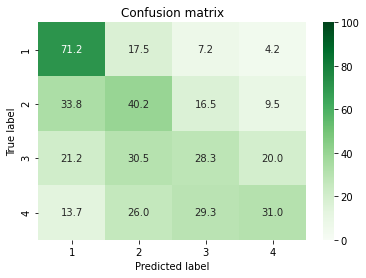

In [53]:
clf = MLPClassifier((1000, ), max_iter=100000).fit(xtrain, ytrain)
predicted_values = clf.predict(X_test)
print_confusion_matrix(predicted_values, y_test, ["1", "2", "3", "4"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

              precision    recall  f1-score   support

           1       0.60      0.47      0.53       600
           2       0.35      0.28      0.31       600
           3       0.29      0.33      0.31       600
           4       0.40      0.52      0.45       600

    accuracy                           0.40      2400
   macro avg       0.41      0.40      0.40      2400
weighted avg       0.41      0.40      0.40      2400

Accuracy: 0.4


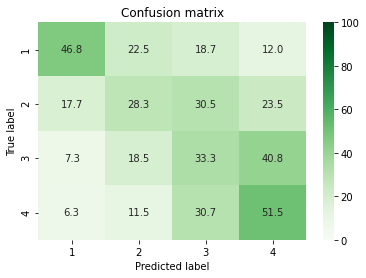

In [54]:
clf = MLPClassifier((256, 64, 128, ), max_iter=100000, learning_rate="invscaling").fit(xtrain, ytrain)
predicted_values = clf.predict(X_test)
print_confusion_matrix(predicted_values, y_test, ["1", "2", "3", "4"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))